# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [44]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [45]:
# Download front-month futures data
symbols = ["ES=F", "NQ=F", "YM=F", "RTY=F", "CL=F"]
data = yf.download(symbols)

[*********************100%***********************]  5 of 5 completed


### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [46]:
# Ensure data is downloaded
if data is None:
	data = yf.download(symbols)

# Resample data to monthly frequency
data = data.resample("M").last()
# Convert index to datetime
data.index = pd.to_datetime(data.index)
# Create a new column with the difference between the close and open prices

/var/folders/67/bb922zxs1458y87dr5v_ytz40000gn/T/ipykernel_6793/850780969.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample("M").last()


In [47]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [48]:
data.head()

Price           Close                                   High                   \
Ticker           CL=F     ES=F    NQ=F RTY=F YM=F       CL=F     ES=F    NQ=F   
Date                                                                            
2000-08-31  33.099998      NaN     NaN   NaN  NaN  33.700001      NaN     NaN   
2000-09-30  30.860001  1454.00  3621.0   NaN  NaN  30.950001  1473.25  3742.5   
2000-10-31  32.689999  1440.75  3298.0   NaN  NaN  32.880001  1445.50  3338.0   
2000-11-30  33.799999  1321.00  2530.0   NaN  NaN  35.099998  1333.75  2589.0   
2000-12-31  26.799999  1327.00  2374.5   NaN  NaN  26.950001  1356.50  2529.5   

Price                  ...       Open                               Volume  \
Ticker     RTY=F YM=F  ...       CL=F     ES=F    NQ=F RTY=F YM=F     CL=F   
Date                   ...                                                   
2000-08-31   NaN  NaN  ...  33.250000      NaN     NaN   NaN  NaN  56895.0   
2000-09-30   NaN  NaN  ...  30.700001  1473.00  3730.0   NaN  NaN  57628.0   
2000-10-31   NaN  NaN  ...  32.730000  1413.25  3108.5   NaN  NaN  63007.0   
2000-11-30   NaN  NaN  ...  34.950001  1332.75  2508.5   NaN  NaN  79900.0   
2000-12-31   NaN  NaN  ...  25.900000  1352.75  2501.5   NaN  NaN  35529.0   

Price                                      
Ticker          ES=F      NQ=F RTY=F YM=F  
Date                                       
2000-08-31       NaN       NaN   NaN  NaN  
2000-09-30   78277.0   57397.0   NaN  NaN  
2000-10-31   89660.0   71326.0   NaN  NaN  
2000-11-30  121701.0  105511.0   NaN  NaN  
2000-12-31   50363.0   56717.0   NaN  NaN  

[5 rows x 25 columns]

In [49]:
# Subset adjusted close prices and fill NaNs
prices = data["Close"].fillna(method="ffill")
prices.fillna(0, inplace=True)  # Or use prices.mean() if that makes sense
# Convert index to datetime
prices.index = pd.to_datetime(prices.index)

/var/folders/67/bb922zxs1458y87dr5v_ytz40000gn/T/ipykernel_6793/1475729303.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = data["Close"].fillna(method="ffill")


In [50]:
# check for missing values
print(prices.isnull().sum())



Ticker
CL=F     0
ES=F     0
NQ=F     0
RTY=F    0
YM=F     0
dtype: int64


In [51]:
print(prices)

Ticker           CL=F     ES=F      NQ=F        RTY=F     YM=F
Date                                                          
2000-08-31  33.099998     0.00      0.00     0.000000      0.0
2000-09-30  30.860001  1454.00   3621.00     0.000000      0.0
2000-10-31  32.689999  1440.75   3298.00     0.000000      0.0
2000-11-30  33.799999  1321.00   2530.00     0.000000      0.0
2000-12-31  26.799999  1327.00   2374.50     0.000000      0.0
...               ...      ...       ...          ...      ...
2024-10-31  69.260002  5738.50  20021.75  2208.600098  41947.0
2024-11-30  68.000000  6051.50  20993.50  2444.600098  45055.0
2024-12-31  71.720001  5935.75  21226.50  2249.800049  42873.0
2025-01-31  72.529999  6067.25  21589.25  2295.399902  44698.0
2025-02-28  69.980003  5877.00  20613.25  2139.500000  43275.0

[295 rows x 5 columns]


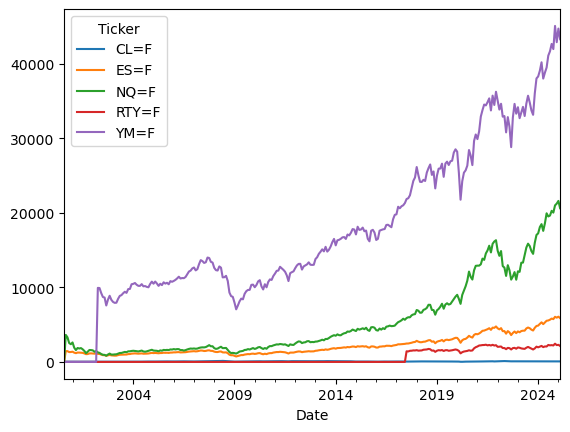

In [52]:
prices.plot()
plt.show()

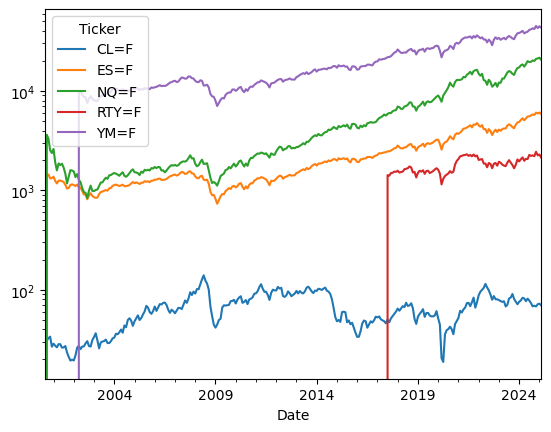

In [53]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [54]:
# Compute arithmetic returns
# returns = prices.pct_change()
# Fill missing values before pct_change
prices_filled = prices.fillna(method="ffill").fillna(method="bfill")

# Calculate percentage change
returns = prices_filled.pct_change().dropna()

# Replace infinite values with NaN, then drop or fill them
returns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optional: Fill remaining NaNs with zero (or other imputation methods)
returns.fillna(0, inplace=True)  # Alternative: returns.fillna(returns.median(), inplace=True)

# Check if any NaNs remain
print(returns.isnull().sum())

Ticker
CL=F     0
ES=F     0
NQ=F     0
RTY=F    0
YM=F     0
dtype: int64


/var/folders/67/bb922zxs1458y87dr5v_ytz40000gn/T/ipykernel_6793/19021711.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices_filled = prices.fillna(method="ffill").fillna(method="bfill")


In [55]:
print(returns)

Ticker          CL=F      ES=F      NQ=F     RTY=F      YM=F
Date                                                        
2017-07-31  0.089705  0.019413  0.040644  0.000000  0.025446
2017-08-31 -0.058601  0.000810  0.018402 -0.013827  0.004945
2017-09-30  0.094008  0.018623 -0.001377  0.062562  0.018041
2017-10-31  0.052448  0.022556  0.044672  0.006564  0.043811
2017-11-30  0.055535  0.029249  0.019081  0.028416  0.040686
...              ...       ...       ...       ...       ...
2024-10-31  0.015989 -0.013028 -0.011821 -0.018051 -0.016322
2024-11-30 -0.018192  0.054544  0.048535  0.106855  0.074093
2024-12-31  0.054706 -0.019127  0.011099 -0.079686 -0.048430
2025-01-31  0.011294  0.022154  0.017089  0.020268  0.042568
2025-02-28 -0.035158 -0.031357 -0.045208 -0.067918 -0.031836

[92 rows x 5 columns]


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [56]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window=window_size).std()
    rolling_inverse_vol = 1 / rolling_vol
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.div(rolling_inverse_vol.sum(axis=1), axis=0)
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

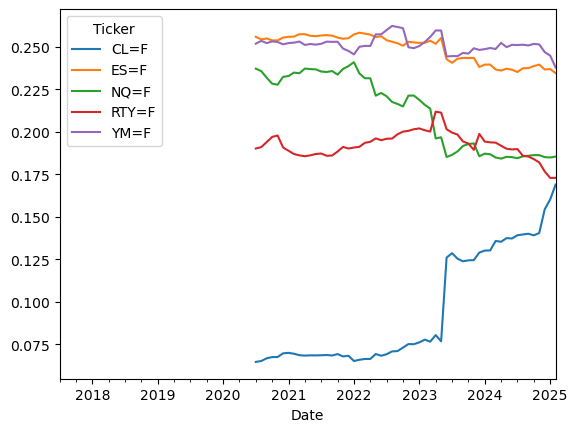

In [57]:
risk_parity_weights.plot()
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [58]:
# Calculate weighted returns
weighted_returns = risk_parity_weights * returns
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [59]:
print(risk_parity_portfolio_returns)

Date
2017-07-31    0.000000
2017-08-31    0.000000
2017-09-30    0.000000
2017-10-31    0.000000
2017-11-30    0.000000
                ...   
2024-10-31   -0.010519
2024-11-30    0.057643
2024-12-31   -0.020072
2025-01-31    0.024151
2025-02-28   -0.041006
Freq: ME, Length: 92, dtype: float64


### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [60]:
# Evaluate portfolio performance
annual_mean_return = returns.mean() * 12
annual_volatility = returns.std() * np.sqrt(12)
skewness = returns.skew()
kurtosis = returns.kurtosis()

# Compute drawdown
cumulative_returns = (1 + returns).cumprod()
running_max = np.maximum.accumulate(cumulative_returns)
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# Compute Sharpe ratio
sharpe_ratio = annual_mean_return / annual_volatility
# Compute Sortino ratio
downside_std = returns[returns < 0].std() * np.sqrt(12)
sortino_ratio = annual_mean_return / downside_std

# Compute Calmar ratio
calmar_ratio = annual_mean_return / max_drawdown

# Display results
print("Mean Annual Return:")
print(annual_mean_return.apply(lambda x: f"{x:.4f}"))
print("\nAnnual Volatility:")
print(annual_volatility.apply(lambda x: f"{x:.4f}"))
print("\nSkewness:")
print(skewness.apply(lambda x: f"{x:.4f}"))
print("\nKurtosis:")
print(kurtosis.apply(lambda x: f"{x:.4f}"))
print("\nMaximum Drawdown:")
print(max_drawdown.apply(lambda x: f"{x:.4f}"))
print("\nSharpe Ratio:")
print(sharpe_ratio.apply(lambda x: f"{x:.4f}"))
print("\nSortino Ratio:")
print(sortino_ratio.apply(lambda x: f"{x:.4f}"))
print("\nCalmar Ratio:")
print(calmar_ratio.apply(lambda x: f"{x:.4f}"))

Mean Annual Return:
Ticker
CL=F     0.1656
ES=F     0.1300
NQ=F     0.1892
RTY=F    0.0785
YM=F     0.1067
dtype: object

Annual Volatility:
Ticker
CL=F     0.4848
ES=F     0.1662
NQ=F     0.1975
RTY=F    0.2249
YM=F     0.1672
dtype: object

Skewness:
Ticker
CL=F      1.9372
ES=F     -0.4517
NQ=F     -0.2901
RTY=F    -0.2598
YM=F     -0.2101
dtype: object

Kurtosis:
Ticker
CL=F     17.8975
ES=F      0.3196
NQ=F     -0.1066
RTY=F     1.0680
YM=F      0.7295
dtype: object

Maximum Drawdown:
Ticker
CL=F     -0.7459
ES=F     -0.2431
NQ=F     -0.3246
RTY=F    -0.3407
YM=F     -0.2370
dtype: object

Sharpe Ratio:
Ticker
CL=F     0.3417
ES=F     0.7821
NQ=F     0.9579
RTY=F    0.3489
YM=F     0.6380
dtype: object

Sortino Ratio:
Ticker
CL=F     0.5289
ES=F     1.2166
NQ=F     1.5356
RTY=F    0.5325
YM=F     1.0378
dtype: object

Calmar Ratio:
Ticker
CL=F     -0.2220
ES=F     -0.5346
NQ=F     -0.5828
RTY=F    -0.2303
YM=F     -0.4500
dtype: object


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


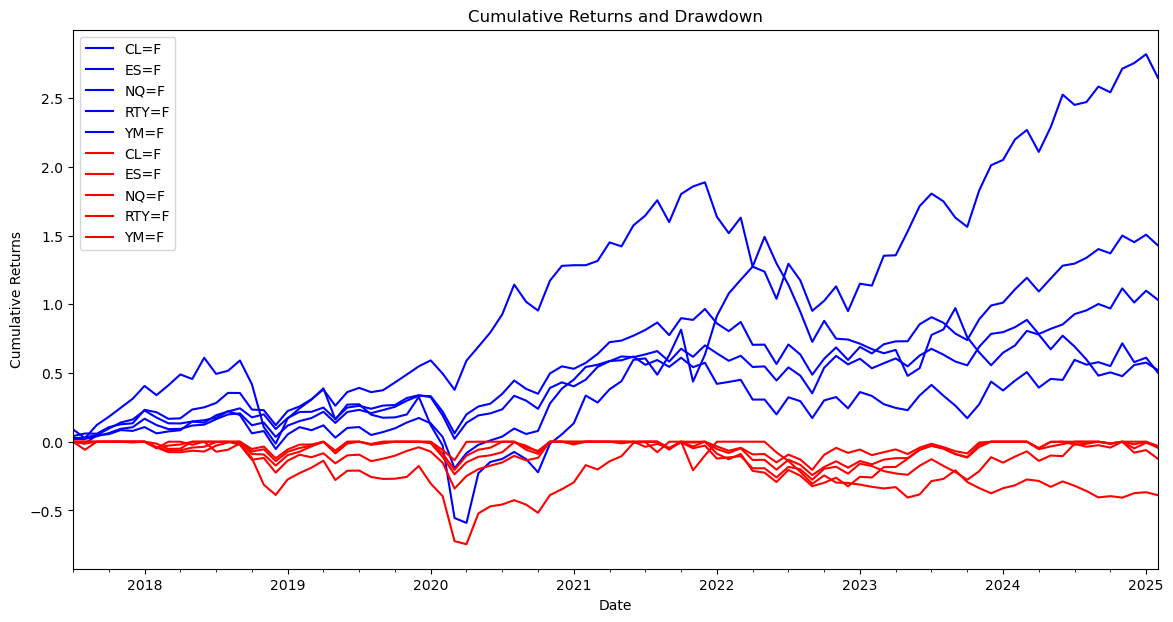

In [61]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()